In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("water_potability.csv")

In [3]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [6]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#### We have missing values in ph, sulfate and trihalomethanes columns. So, we will impute missing values with mean of the respective columns.

In [8]:
data['ph'] = data['ph'].fillna(7.080795)
data['Sulfate'] = data['Sulfate'].fillna(333.775777)
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(66.396293)

In [9]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#### Now we have no missing value

In [10]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

#### All the columns have correct data type. No need for any change.

In [11]:
data['Potability'].unique()

array([0, 1], dtype=int64)

In [12]:
data['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

#### So, 1998 water bodies are non-potable and 1278 of them are potable.

([<matplotlib.axis.XTick at 0x1aa34fde570>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

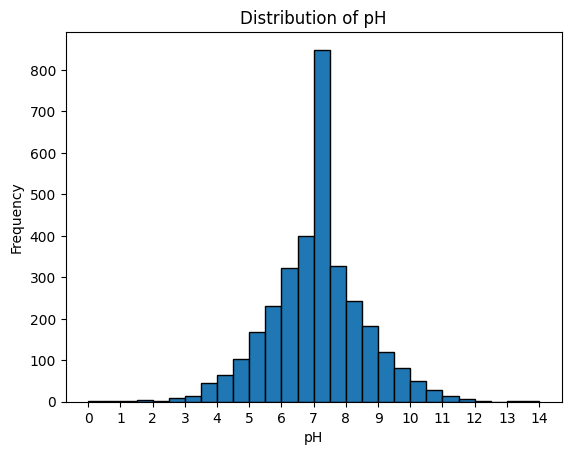

In [13]:
data['ph'].hist(bins=28, edgecolor='black', grid = False)
plt.title('Distribution of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.xticks(range(0, 15, 1))

#### The graph is bell-shaped indicating that it is normally distributed. The peak of distribution is around 7 - 8 ph indicating most of the water bodies have ph between this range.

Text(0.5, 1.0, 'Box Plot of pH')

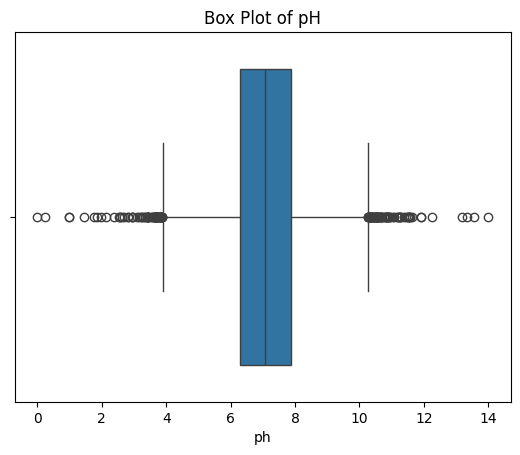

In [14]:
sns.boxplot(data=data, x='ph')
plt.title('Box Plot of pH')

#### The central box spans from approximately pH 6 to pH 8, representing the middle 50% of the data. The median pH value is around 7, which is the line in the center of the box. There are numerous outliers on both the lower end (below pH 4) and the upper end (above pH 10), suggesting some extreme pH values in the dataset.

Text(0.5, 1.0, 'KDE Plot of pH')

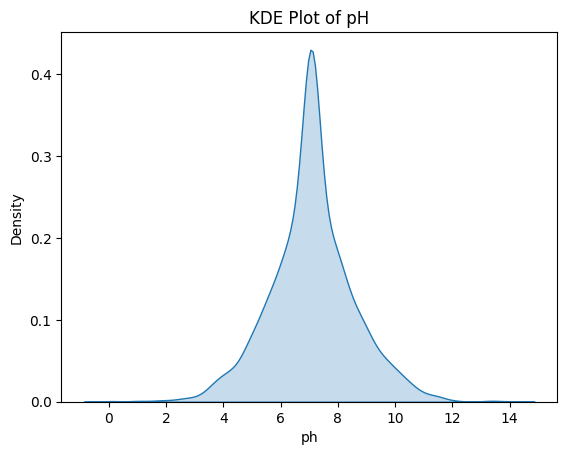

In [15]:
sns.kdeplot(data['ph'], fill=True)
plt.title('KDE Plot of pH')

#### The majority of your samples are clustered around a neutral pH of 7, with a balanced spread of pH values on either side. There are fewer extreme acidic or basic pH values in your dataset.

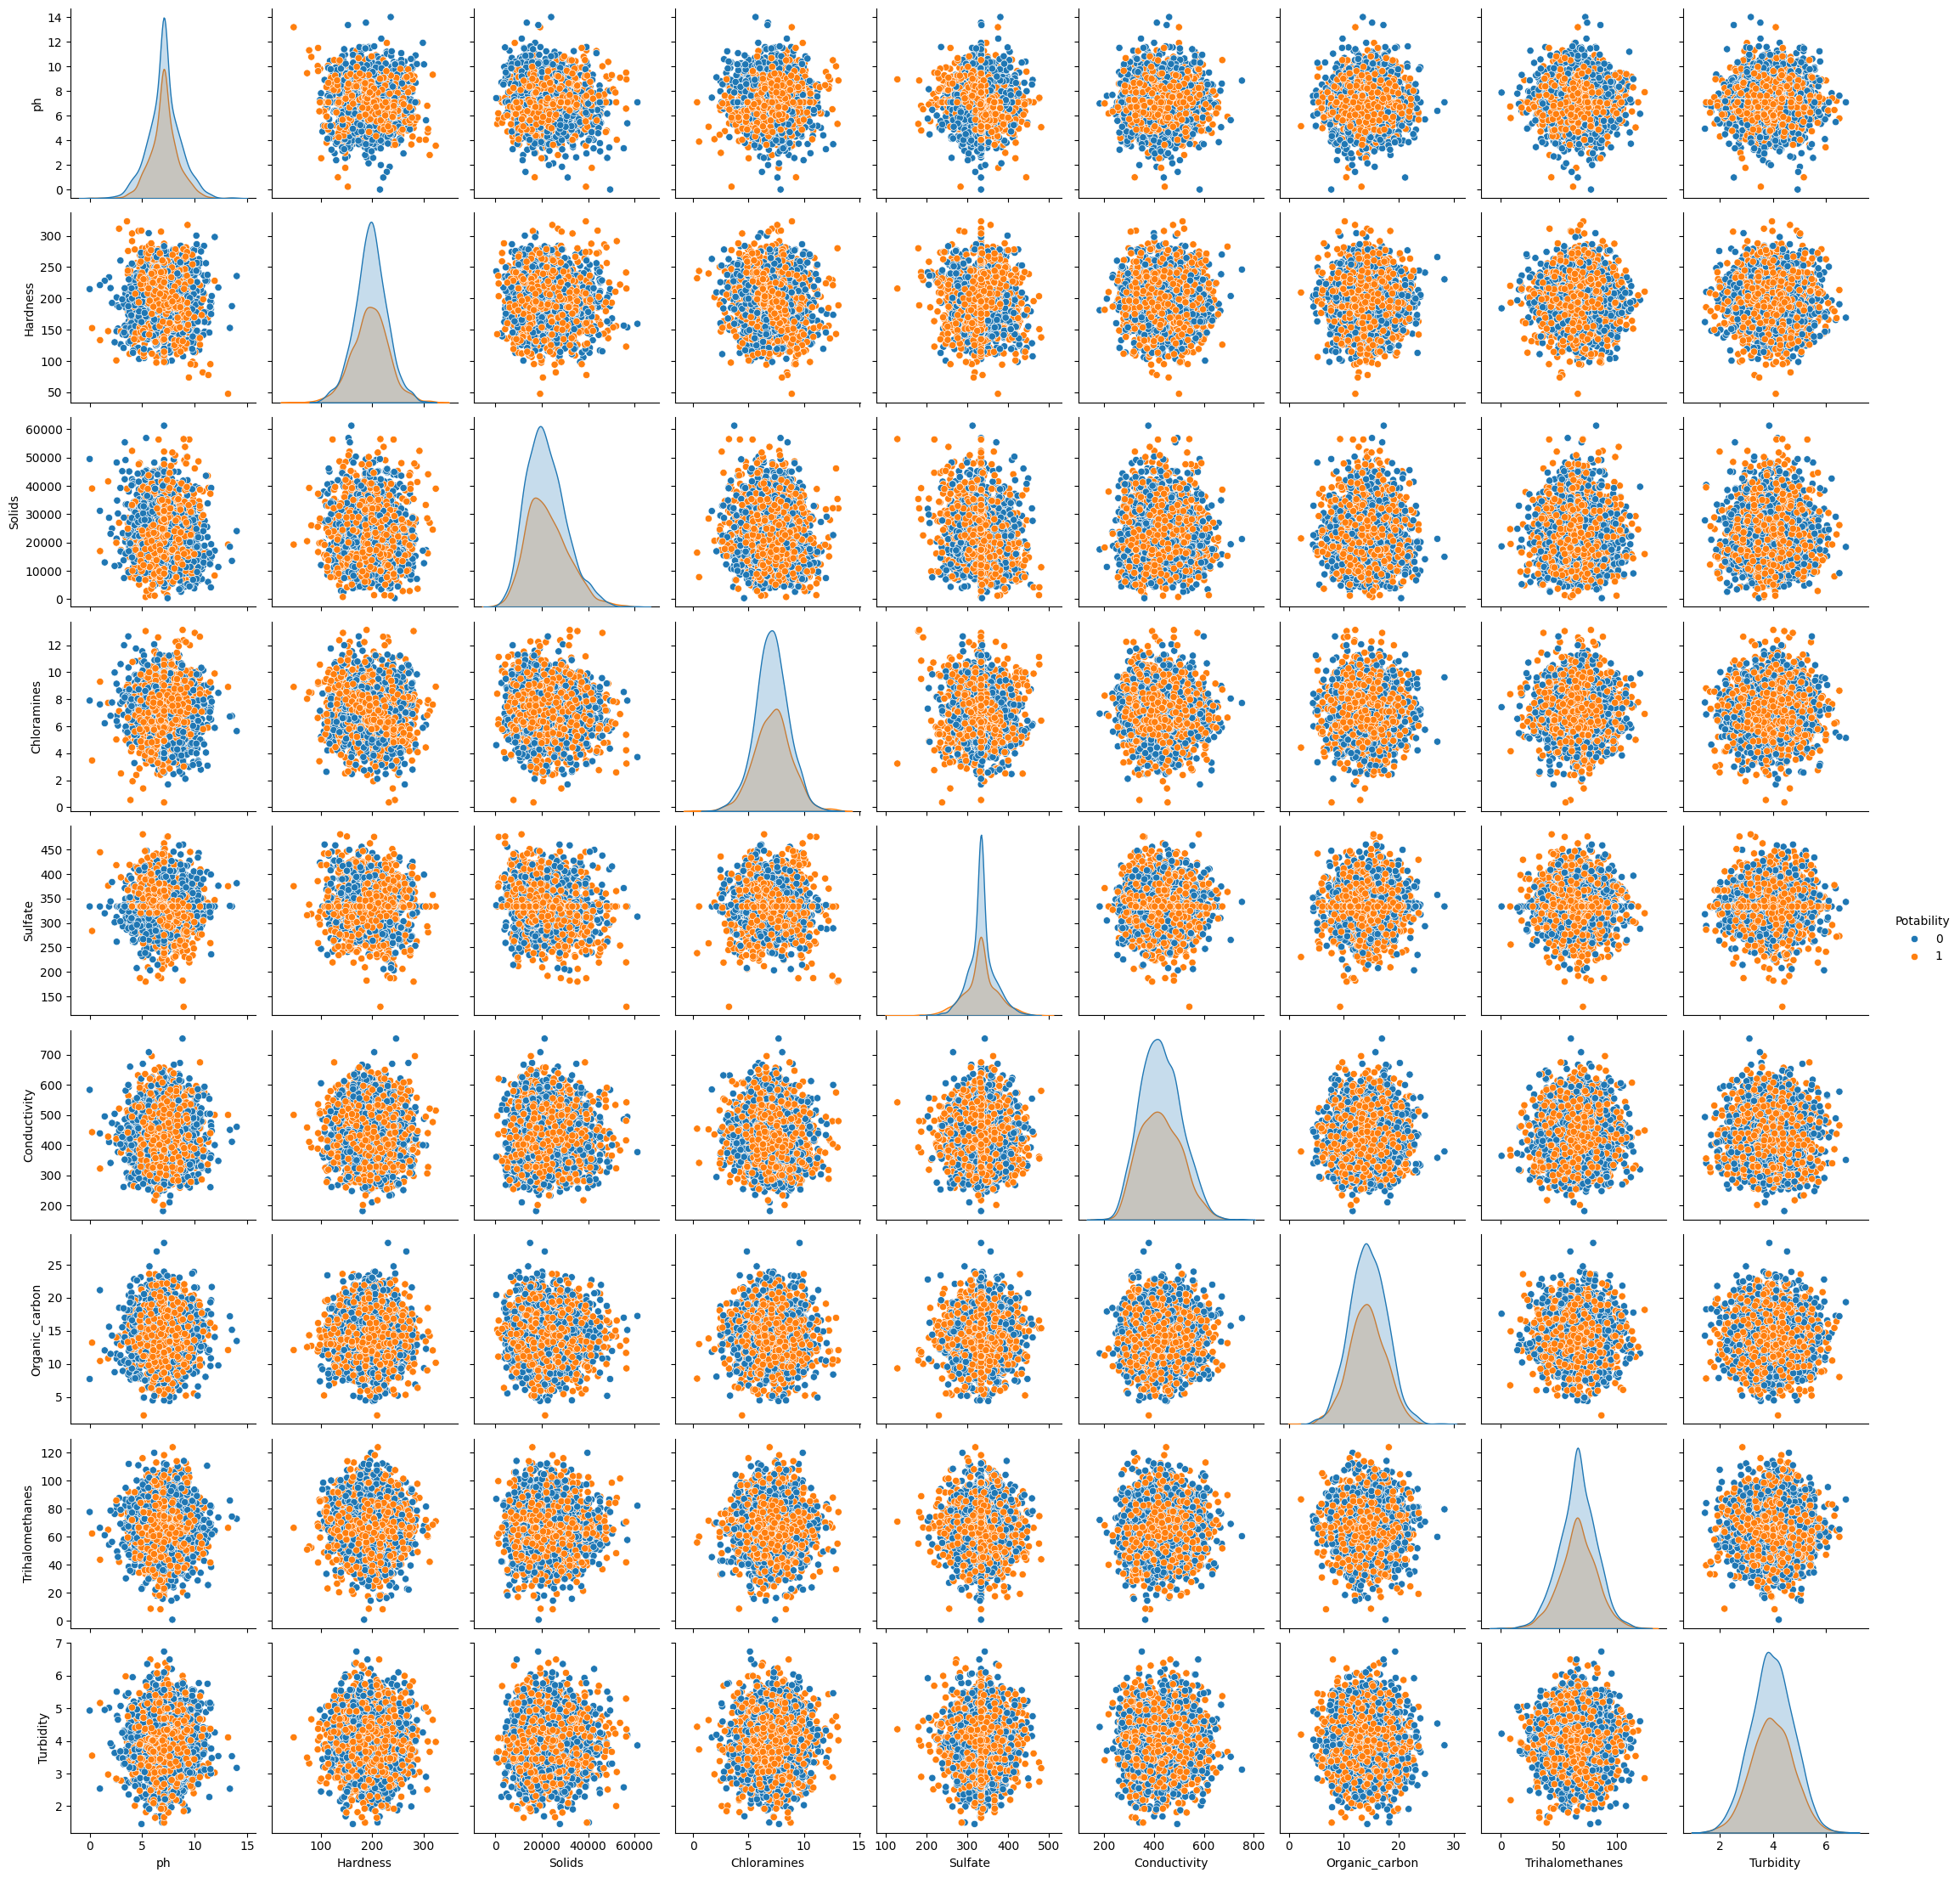

In [16]:
sns.pairplot(data, diag_kind='kde', hue='Potability')

#### From the pairplot, we see the distributions and relationships between the variables. Most variables show weak or no linear relationships, and there is no clear separation between categories of 'Potability'. Some clusters and outliers are present. The 'Conductivity' and 'Sulfate' variables show a slight positive correlation.

Text(0.5, 1.0, 'Correlation Heatmap')

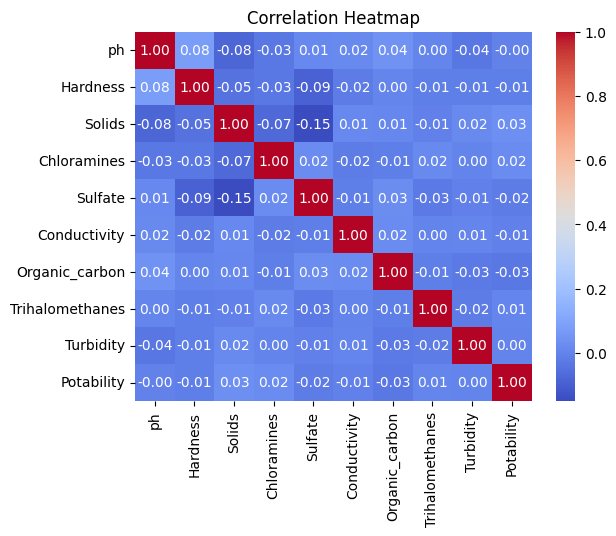

In [17]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

#### There are no strong positive or negative correlations between different parameters, suggesting that changes in one parameter do not significantly affect the others.

Text(0.5, 1.0, 'pH vs Potability')

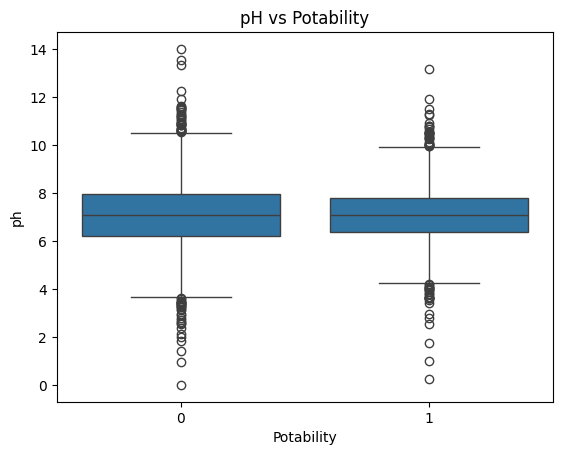

In [18]:
sns.boxplot(data=data, x='Potability', y='ph')
plt.title('pH vs Potability')


#### The box plot compares the pH levels of potable and non-potable water. Both categories have a median pH around 7, with interquartile ranges from approximately 6.5 to 8.5. There are several outliers, more extreme in non-potable water. Overall, pH levels are similar in both categories, despite the outliers.



Text(0.5, 1.0, 'pH Distribution by Potability')

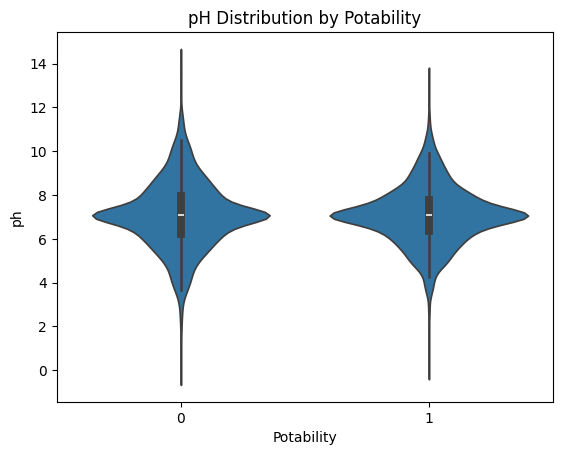

In [19]:
sns.violinplot(data=data, x='Potability', y='ph')
plt.title('pH Distribution by Potability')

#### Both categories have similar pH distributions, with most values concentrated around 7 to 8. There is more variability in pH levels for non-potable water. The spread of values indicates that while both types of water have comparable pH levels, non-potable water tends to have more extreme pH values.

Text(0.5, 1.0, 'pH vs Conductivity by Potability')

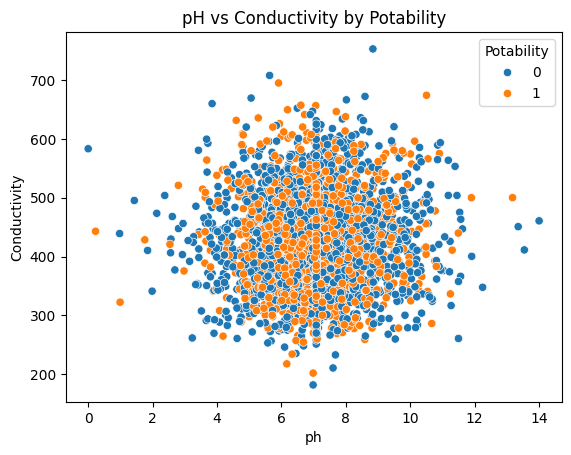

In [20]:
sns.scatterplot(data=data, x='ph', y='Conductivity', hue='Potability')
plt.title('pH vs Conductivity by Potability')


#### There is no clear distinction between the two categories based on these parameters alone, as both are widely spread across the graph and overlap significantly. The pH values range from 0 to 14, and conductivity values range from 200 to 700. Overall, pH and conductivity are not strong indicators of water potability.